# Assignment 3 - Numpy and Matplotlib
### Due Thursday September 27


## 1 Creating and Manipulating Arrays

First import numpy and matplotlib

In [2]:
#import numpy and matplotlib
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### 1.1. Create two 2D arrays representing coordinates x, y on the cartesian plan
Both should cover the range (-2, 2) and have 100 points in each direction

In [3]:
#create two 2D arrays
x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)
xx,yy = np.meshgrid(x,y)
xx.shape, yy.shape

((100, 100), (100, 100))

### 1.2. Visualize each 2D array using `pcolormesh`

Use the correct coordiantes for the x and y axes. Provide axis labels for all of your plots in this assignment.

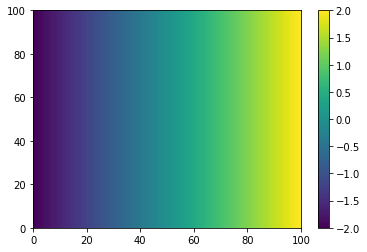

In [4]:
#Use colormesh to create visuals for x axis
plt.pcolormesh(xx)
plt.colorbar()

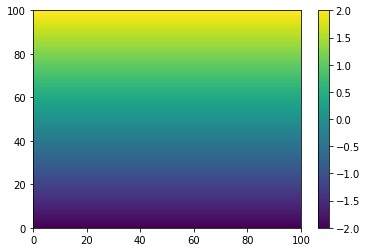

In [5]:
#Use colormesh to create visuals for y axis
plt.pcolormesh(yy)
plt.colorbar()

### 1.3 From your cartesian coordinates, create polar coordinates $r$ and $\varphi$

Refer to the [wikipedia page](https://en.wikipedia.org/wiki/Polar_coordinate_system#Converting_between_polar_and_Cartesian_coordinates) for the conversion formula. You will need to use numpy's `arctan2` function. Read its documentation.


In [6]:
#transform to cartesian coordinates
r = (xx ** 2 + yy ** 2) ** (1/2)
phi = np.arctan2(yy,xx)

### 1.4. Visualize $r$ and $\varphi$ as functions of $x$ and $y$

Text(0,0.5,'y')

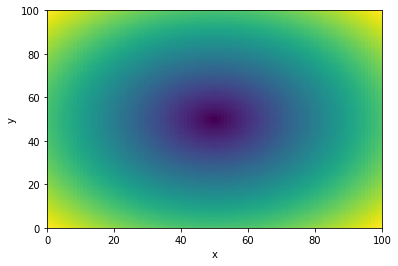

In [9]:
plt.pcolormesh(r)
plt.xlabel('x')
plt.ylabel('y')

Text(0,0.5,'y')

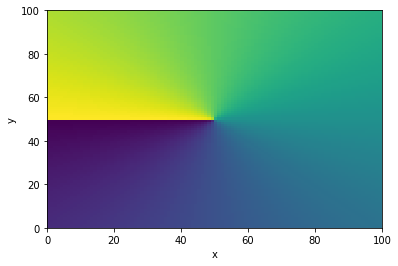

In [10]:
plt.pcolormesh(phi)
plt.xlabel('x')
plt.ylabel('y')

### 1.5 Define the function $f = \cos^2(4r) + \sin^2(4\varphi)$

And plot it as a function of $x$ and $y$

Text(0.5,1,'f as a function of x and y')

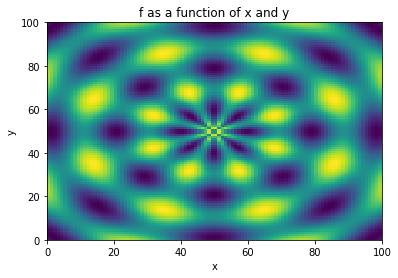

In [12]:
f = (np.cos(4 * r))**2 + (np.sin(4 * phi))**2
plt.pcolormesh(f)
plt.xlabel('x')
plt.ylabel('y')
plt.title('f as a function of x and y')

### 1.6 Plot the mean of f with respect to the x axis

as a function of y

In [14]:
fmean = f.mean(axis=1)

Text(0,0.5,'y axis')

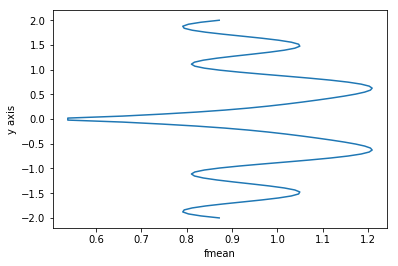

In [15]:
plt.plot(fmean,y)
plt.xlabel('fmean')
plt.ylabel('y axis')

### 1.7 Plot the mean of f with respect to the y axis

as a function of x

In [16]:
fmean = f.mean(axis=0)

Text(0,0.5,'fmean')

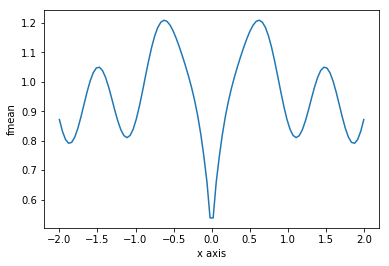

In [17]:
plt.plot(x,fmean)
plt.xlabel('x axis')
plt.ylabel('fmean')

### 1.8 Plot the mean of $f$ with respect to $r$ (worth 3 points)

This is hard. You will need to define a discrete range of $r$ values and then figure out how to average $f$ within the bins defined by your $r$ grid. There are many different ways to accomplish this.

In [18]:
# define a discrete range of r values
r_range = np.arange(0,2,0.01)

In [19]:
#average f wintin the bins defined by r grid
#r_boolean = ((r>r.min()) & (r<r.max()))
f_r = []

for i in r_range:
    r_bool = ((r > i) & ( r < i + 0.01))
    bool_test = f[r_bool].mean()
    f_r.append(bool_test)
    
print(f_r)

[nan, nan, 0.9869968628359855, nan, nan, nan, 1.8577095630771399, nan, 0.8869945458956002, nan, 1.3437988045028835, 1.483580691337482, nan, nan, 0.9002007167273528, 1.6643500149400188, nan, 0.9662597955978554, 0.7370019869754034, 1.1220676636601017, 1.2583132190079533, nan, 0.5195049780638228, 0.8621854633813776, 1.2952971772350956, 0.2663468017892152, 0.6711444112066124, nan, 0.7468977878571768, 0.9807586930724759, 0.4013856747273268, 0.6281534614067722, nan, 1.0228382471091881, 0.2266611760667514, 0.7810614829056162, nan, 0.5376372617739842, 0.41784330848180445, 0.7346221320008247, 0.5408833476264125, nan, 0.3854609509003445, 0.47893571916029765, 0.8774851895123867, 0.12776576946830168, 0.5139484480105692, 0.8335219559946125, 0.5597648956921645, 0.9855097941575349, 0.3134620459866506, 0.723573601365547, 0.8297823676003078, 1.1643502459624768, 0.43819484162302685, 1.0220243865108145, 1.2125634959251803, 0.8689856890471978, 0.9641147229012325, 0.7945872643200929, 1.140425779433256, 1.2

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: Mean of empty slice.
/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5,1,'Mean of f With Respect to r')

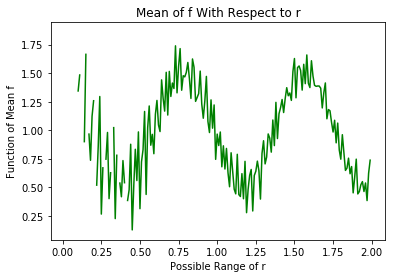

In [25]:
plt.plot(r_range,f_r,'g')
plt.xlabel('Possible Range of r')
plt.ylabel('Function of Mean f')
plt.title('Mean of f With Respect to r')

## Part 2: Analyze ARGO Data


### 1.1 Use the shell command `wget` to download an example ARGO float profile from the North Atlantic.
The data file's url is http://www.ldeo.columbia.edu/~rpa/argo_float_4901412.npz

In [26]:
# download with curl
!curl -O https://www.ldeo.columbia.edu/~rpa/argo_float_4901412.npz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  140k  100  140k    0     0   354k      0 --:--:-- --:--:-- --:--:--  353k


### 1.2 Load the data file

In [27]:
# load numpy file and examine keys
data = np.load('argo_float_4901412.npz')
data.keys()
for keys in data:
    print(keys)

S
T
levels
lon
date
P
lat


### 1.3 Extract the temperature, pressure and salinity arrays to arrays T, S, P and masking out invalid data (the nan values from missing points).

In [29]:
#get rid of "nans" and missing data

T = np.ma.masked_invalid(data['T'])
S = np.ma.masked_invalid(data['S'])
P = np.ma.masked_invalid(data['P'])

### 1.4 Extract the date, lat, lon, and level arrays. 


In [31]:
#access data
date = data['date']
lat = data['lat']
lon = data['lon']
levels = data['levels']

### 1.5 Note the shapes of T, S and P compared to these arrays. How do they line up?

In [33]:
#see the shape of variables
#they do line up because levels have 78 items and others have 75 accordingly
print(T.shape,S.shape,P.shape)
print(date.shape,lat.shape,lon.shape,levels.shape)

(78, 75) (78, 75) (78, 75)
(75,) (75,) (75,) (78,)


### 1.6 Load the necessary package for plotting using pyplot from matplotlib.

In [112]:
from matplotlib import pyplot as plt
%matplotlib inline

### 1.7 Make a 1 x 3 array of plots for each column of data in T, S and P. 
The vertical scale should be the `levels` data. Flip the veritcal axis direction so that levels increase downward on the plot. Each plot should have a line for each column of data. It will look messy.  Make sure you label the axes and put a title on each subplot.

Text(0.5,1,'Temperature vs Level')

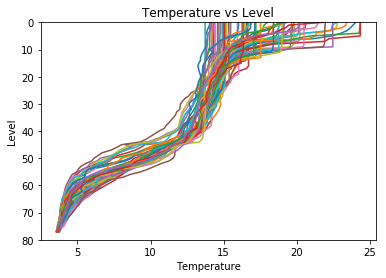

In [34]:
#Plot temperature and depth and flip the axis to better visualize
plt.plot(T,levels)
plt.ylim(80,0)
plt.xlabel('Temperature')
plt.ylabel('Level')
plt.title('Temperature vs Level')

Text(0.5,1,'Salinity vs Level')

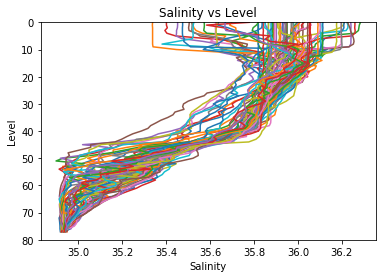

In [35]:
#Plot salinity and depth and flip the axis to better visualize
plt.plot(S,levels)
plt.ylim(80,0)
plt.xlabel('Salinity')
plt.ylabel('Level')
plt.title('Salinity vs Level')

Text(0.5,1,'Pressure vs Level')

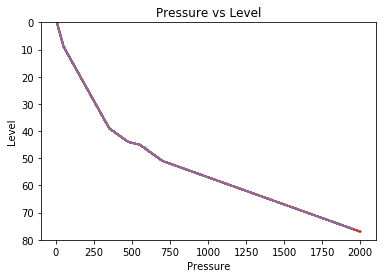

In [36]:
#Plot pressure and depth and flip the axis to better visualize
plt.plot(P,levels)
plt.ylim(80,0)
plt.xlabel('Pressure')
plt.ylabel('Level')
plt.title('Pressure vs Level')

### 1.8 Compute the mean and standard deviation of each of T, S and P at each depth in `level`.

In [37]:
#depth corresponds to axis=1
T_mean = T.mean(axis=1)
T_std = T.std(axis=1)

In [38]:
S_mean = S.mean(axis=1)
S_std = S.std(axis=1)

In [39]:
P_mean = P.mean(axis=1)
P_std = P.std(axis=1)

### 1.9 Now make a similar plot, but show only the mean T, S and P at each depth. Show error bars on each plot using the standard deviations. 
 Again, make sure you label the axes and put a title on each subplot.

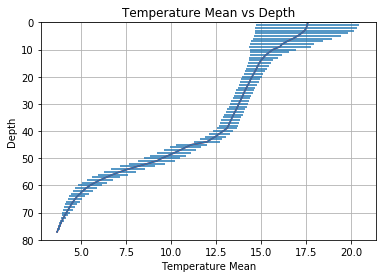

In [40]:
#plot the mean with respect to levels and show std as error bars
plt.plot(T_mean,levels,'r')
plt.ylim(80,0)
plt.errorbar(T_mean,levels,xerr = T_std)
plt.xlabel('Temperature Mean')
plt.ylabel('Depth')
plt.title('Temperature Mean vs Depth')
plt.grid(True)
plt.show()

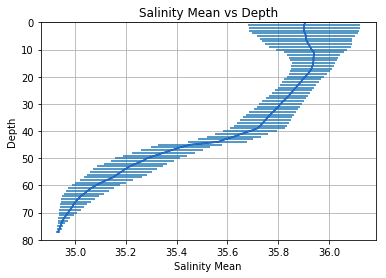

In [41]:
#plot the mean salinity with respect to levels and show std as error bars
plt.plot(S_mean,levels,'b')
plt.ylim(80,0)
plt.errorbar(S_mean,levels,xerr= S_std)
plt.xlabel('Salinity Mean')
plt.ylabel('Depth')
plt.title('Salinity Mean vs Depth')
plt.grid(True)
plt.show()

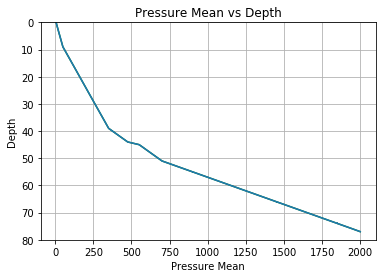

In [42]:
#plot the mean pressure with respect to levels and show std as error bars
plt.plot(P_mean,levels,'g')
plt.ylim(80,0)
plt.errorbar(P_mean,levels,xerr = P_std)
plt.xlabel('Pressure Mean')
plt.ylabel('Depth')
plt.title('Pressure Mean vs Depth')
plt.grid(True) 
plt.show()

### 1.10  Compute the mean and standard deviation of each of T, S and P for each time in `date`.

In [43]:
#data correspond to axis = 0
T_mean_time = T.mean(axis=0)
T_std_time = T.std(axis=0)

In [44]:
S_mean_time = S.mean(axis=0)
S_std_time = S.std(axis=0)

In [45]:
P_mean_time = P.mean(axis=0)
P_std_time = P.std(axis=0)

### 1.11 Plot the mean T, S and P for each entry in *time*, now on a *3 x 1* subplot grid with time on the horizontal axis. Show error bars on each plot using the standard deviations.

In [46]:
import matplotlib.dates as newdates
date2 = newdates.date2num(date)

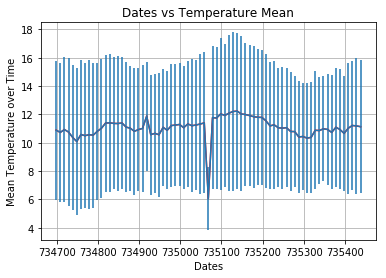

In [47]:
#use this new date2 for plotting
plt.plot(date2,T_mean_time,'r')
plt.errorbar(date2,T_mean_time, yerr = T_std_time)
plt.xlabel('Dates')
plt.ylabel('Mean Temperature over Time')
plt.title('Dates vs Temperature Mean')
plt.grid(True)
plt.show()

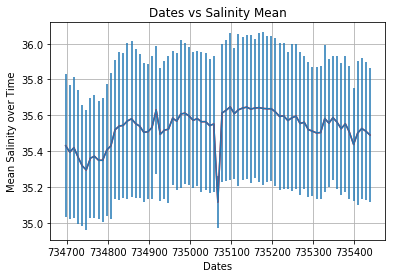

In [48]:
#plot date vs mean salinity
plt.plot(date2,S_mean_time,'r')
plt.errorbar(date2,S_mean_time, yerr = S_std_time)
plt.xlabel('Dates')
plt.ylabel('Mean Salinity over Time')
plt.title('Dates vs Salinity Mean')
plt.grid(True)
plt.show()

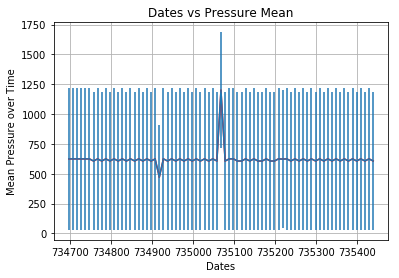

In [49]:
#plot date vs mean pressure
plt.plot(date2,P_mean_time,'r')
plt.errorbar(date2,P_mean_time, yerr = P_std_time)
plt.xlabel('Dates')
plt.ylabel('Mean Pressure over Time')
plt.title('Dates vs Pressure Mean')
plt.grid(True)
plt.show()

### 1.12 Create a scatter plot of the positions of the ARGO float data.  Color the positions by the date. Add a grid overlay. 
Don't forget to label the axes!

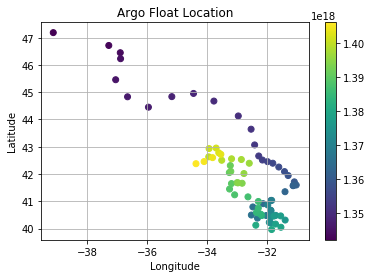

In [52]:
#x axis show longtitude and y axis show latitude to represent location
plt.scatter(lon, lat, c=date)
plt.grid(True)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Argo Float Location')
plt.show()